# MelodyMetrics – Data Visualizations

This notebook presents insights and visualizations based on streaming data collected from Spotify and Billboard.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import ast

plt.style.use('seaborn-v0_8')
df = pd.read_csv('final_music_dataset_cleaned.csv')

## 1. Top Songs by Popularity

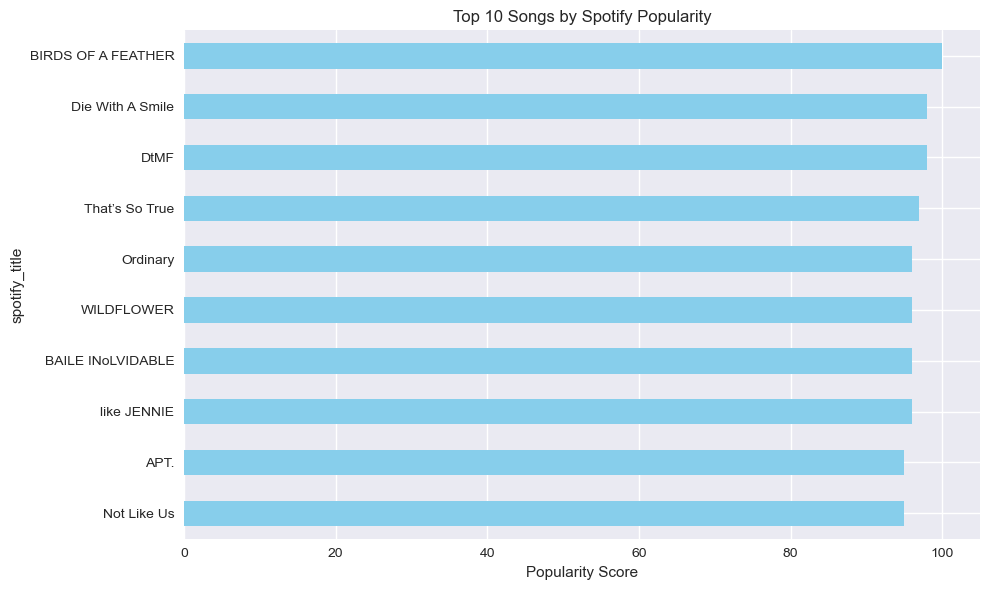

In [16]:
df.nlargest(10, 'track_popularity')[['spotify_title', 'spotify_artist', 'track_popularity']] \
    .plot.barh(x='spotify_title', y='track_popularity', figsize=(10, 6), color='skyblue', legend=False)

plt.title('Top 10 Songs by Spotify Popularity')
plt.xlabel('Popularity Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## 2. Artists with Most Spotify Followers

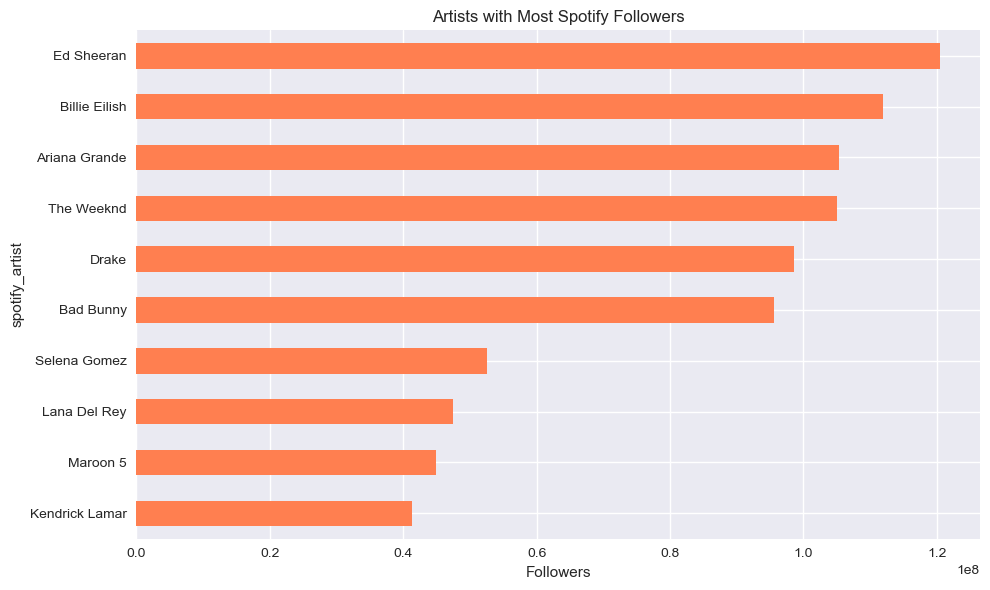

In [18]:
top_artists = df.groupby('spotify_artist')['artist_followers'].max().nlargest(10)

top_artists.plot(kind='barh', color='coral', figsize=(10, 6))
plt.title('Artists with Most Spotify Followers')
plt.xlabel('Followers')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 3. Genre Distribution

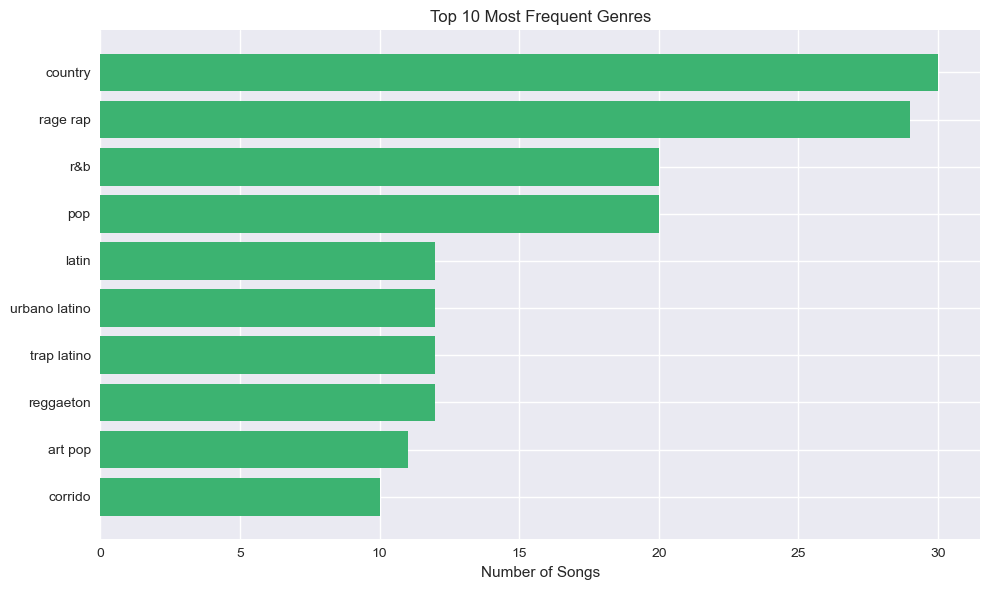

In [20]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

all_genres = []

# Split each genre string by comma and strip extra whitespace
for genres in df['artist_genres'].dropna():
    for genre in genres.split(','):
        all_genres.append(genre.strip().lower())

# Filter out 'unknown' genre before counting
filtered_genres = [g for g in all_genres if g.lower() != 'unknown']

# Count and plot
genre_counts = Counter(filtered_genres)
genre_df = pd.DataFrame(genre_counts.items(), columns=['genre', 'count'])
genre_df = genre_df.sort_values(by='count', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(genre_df['genre'], genre_df['count'], color='mediumseagreen')
plt.title('Top 10 Most Frequent Genres')
plt.xlabel('Number of Songs')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## 4. Popularity vs Followers

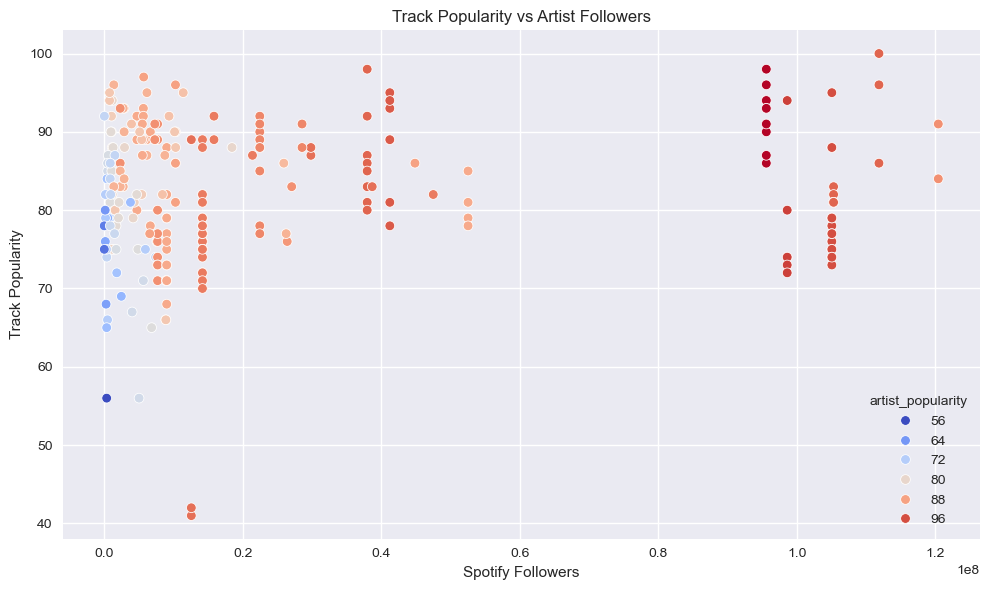

In [22]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='artist_followers', y='track_popularity', hue='artist_popularity', palette='coolwarm')
plt.title('Track Popularity vs Artist Followers')
plt.xlabel('Spotify Followers')
plt.ylabel('Track Popularity')
plt.tight_layout()
plt.show()

## 5. Popularity Over Time

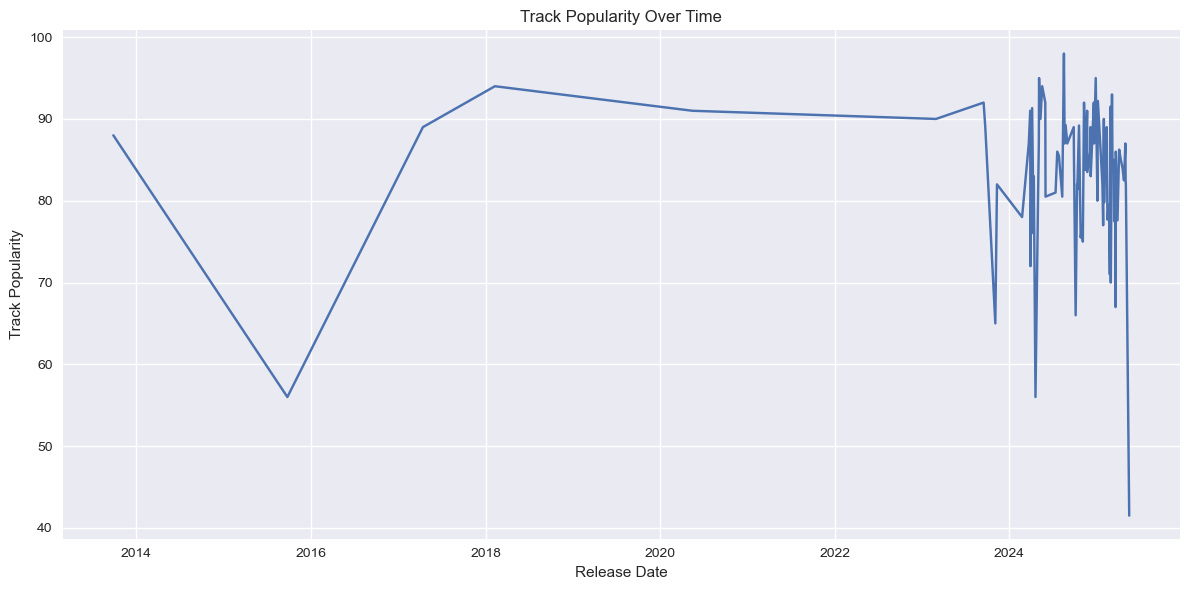

In [41]:
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df.sort_values('release_date', inplace=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='release_date', y='track_popularity', errorbar=None)
plt.title('Track Popularity Over Time')
plt.xlabel('Release Date')
plt.ylabel('Track Popularity')
plt.tight_layout()
plt.show()

In [ ]:
6. Top 5 Genres Over Time (Line Plot)

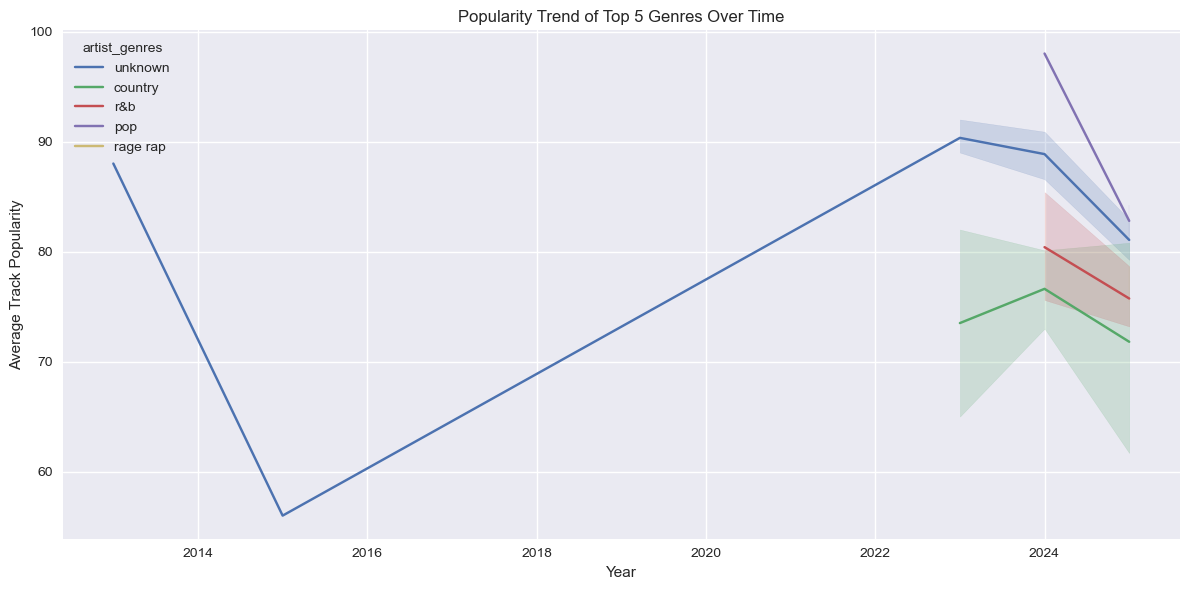

In [47]:
top_genres = df_exploded['artist_genres'].value_counts().head(5).index
top_genre_df = df_exploded[df_exploded['artist_genres'].isin(top_genres)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=top_genre_df, x='release_year', y='track_popularity', hue='artist_genres', estimator='mean')
plt.title('Popularity Trend of Top 5 Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Average Track Popularity')
plt.tight_layout()
plt.show()

In [ ]:
7.Virality Detection: Distribution of Popularity Scores

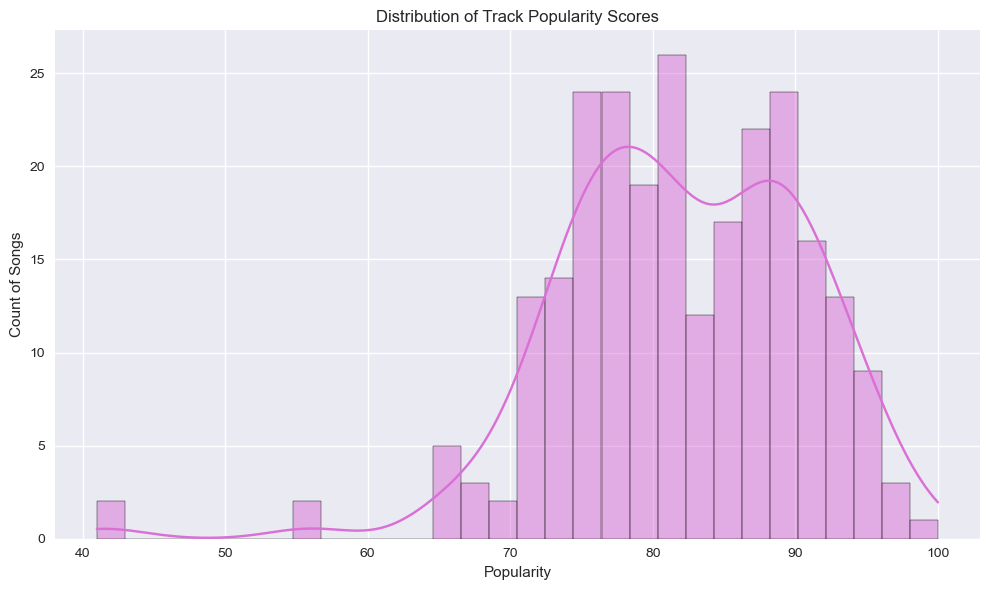

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(df['track_popularity'], bins=30, kde=True, color='orchid')
plt.title('Distribution of Track Popularity Scores')
plt.xlabel('Popularity')
plt.ylabel('Count of Songs')
plt.tight_layout()
plt.show()


In [ ]:
8.Followers vs Artist Popularity (with Regression)

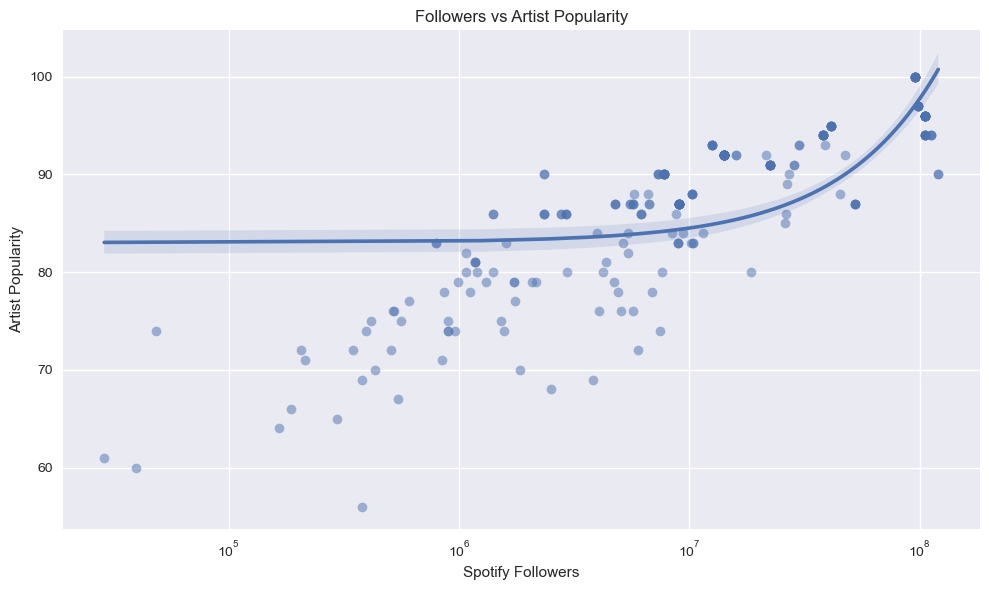

In [55]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='artist_followers', y='artist_popularity', scatter_kws={'alpha': 0.5})
plt.title('Followers vs Artist Popularity')
plt.xlabel('Spotify Followers')
plt.ylabel('Artist Popularity')
plt.xscale('log')
plt.tight_layout()
plt.show()

In [ ]:
9.Popularity Drop-Off by Release Year

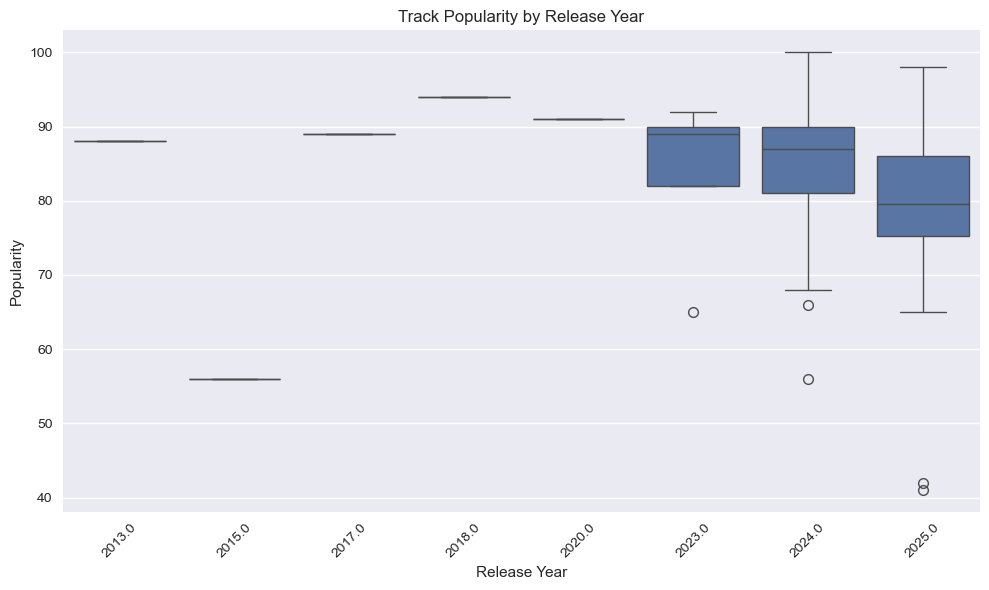

In [59]:
df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='release_year', y='track_popularity')
plt.xticks(rotation=45)
plt.title('Track Popularity by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Popularity')
plt.tight_layout()
plt.show()

In [ ]:
“One-Hit Wonders”: Artists with One Song Only

In [61]:
artist_counts = df['spotify_artist'].value_counts()
one_hit_artists = artist_counts[artist_counts == 1].index
one_hit_df = df[df['spotify_artist'].isin(one_hit_artists)]

top_one_hits = one_hit_df.nlargest(10, 'track_popularity')[['spotify_artist', 'spotify_title', 'track_popularity']]
print(top_one_hits)


         spotify_artist                spotify_title  track_popularity
18        Gracie Abrams               That’s So True                97
17                 ROSÉ                         APT.                95
38           Gigi Perez                  Sailor Song                94
15           Lola Young                        Messy                92
87             Chrystal      The Days - NOTION Remix                92
43            Lil Tecca                Dark Thoughts                92
72                 d4vd  Feel It (From “Invincible”)                91
23          Myles Smith                   Stargazing                90
167               Jimin                          Who                90
193  Gabito Ballesteros                       7 DIAS                90
